In [1]:
import warnings

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

## Obtén los datos

In [5]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Seleccionar las columnas numericas
lista_num = data._get_numeric_data().columns
# Crear DF con las columnas numericas
data_num = data[lista_num]
# Crear DF con las columnas categoricas.
data_cat = data.drop(columns=data_num)

In [7]:
# X=data_cat.drop(columns=['Attrition'])
# y=data_cat['Attrition']

In [8]:
from sklearn.preprocessing import OneHotEncoder
# Identificar las columnas categóricas
categorical_columns = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'OverTime',"Attrition"
]
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(data[categorical_columns])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

In [9]:
data_encoded = pd.concat([data_num, encoded_df], axis = 1)
data_encoded

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1466,39,613,6,1,1,2062,4,42,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1467,27,155,4,3,1,2064,2,87,4,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1468,49,1023,2,3,1,2065,4,63,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [10]:
# Renombrar las columnas
data_encoded = data_encoded.rename(columns={
    'OverTime_Yes': 'OverTime',
    'Attrition_Yes': 'Attrition'
})

 ## Preseleccionar cuales son las variables más importantes del dataset: Las mas relacionadas con el pronostico.
- Attrition_Yes
- OverTime_Yes
- MaritalStatus_Single
- JobRole_Sales Representative
- BusinessTravel_Travel_Frequently
- JobRole_Laboratory Technician
- Department_Sales
- DistanceFromHome
- EducationField_Technical Degree
- EducationField_Marketing


In [11]:
abs(data_encoded.corr()["Attrition"].sort_values(ascending=False).head(11))

Attrition                           1.000000
OverTime                            0.246118
MaritalStatus_Single                0.175419
JobRole_Sales Representative        0.157234
BusinessTravel_Travel_Frequently    0.115143
JobRole_Laboratory Technician       0.098290
Department_Sales                    0.080855
DistanceFromHome                    0.077924
EducationField_Technical Degree     0.069355
EducationField_Marketing            0.055781
NumCompaniesWorked                  0.043494
Name: Attrition, dtype: float64

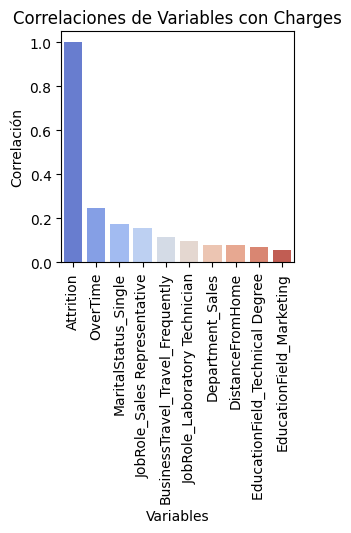

In [12]:
correlation_with_charges = data_encoded.corr()["Attrition"].sort_values(ascending=False).head(10)
plt.figure(figsize=(3, 3))
sns.barplot(x=correlation_with_charges.index, y=correlation_with_charges.values, palette='coolwarm')
plt.title('Correlaciones de Variables con Charges')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

<Axes: >

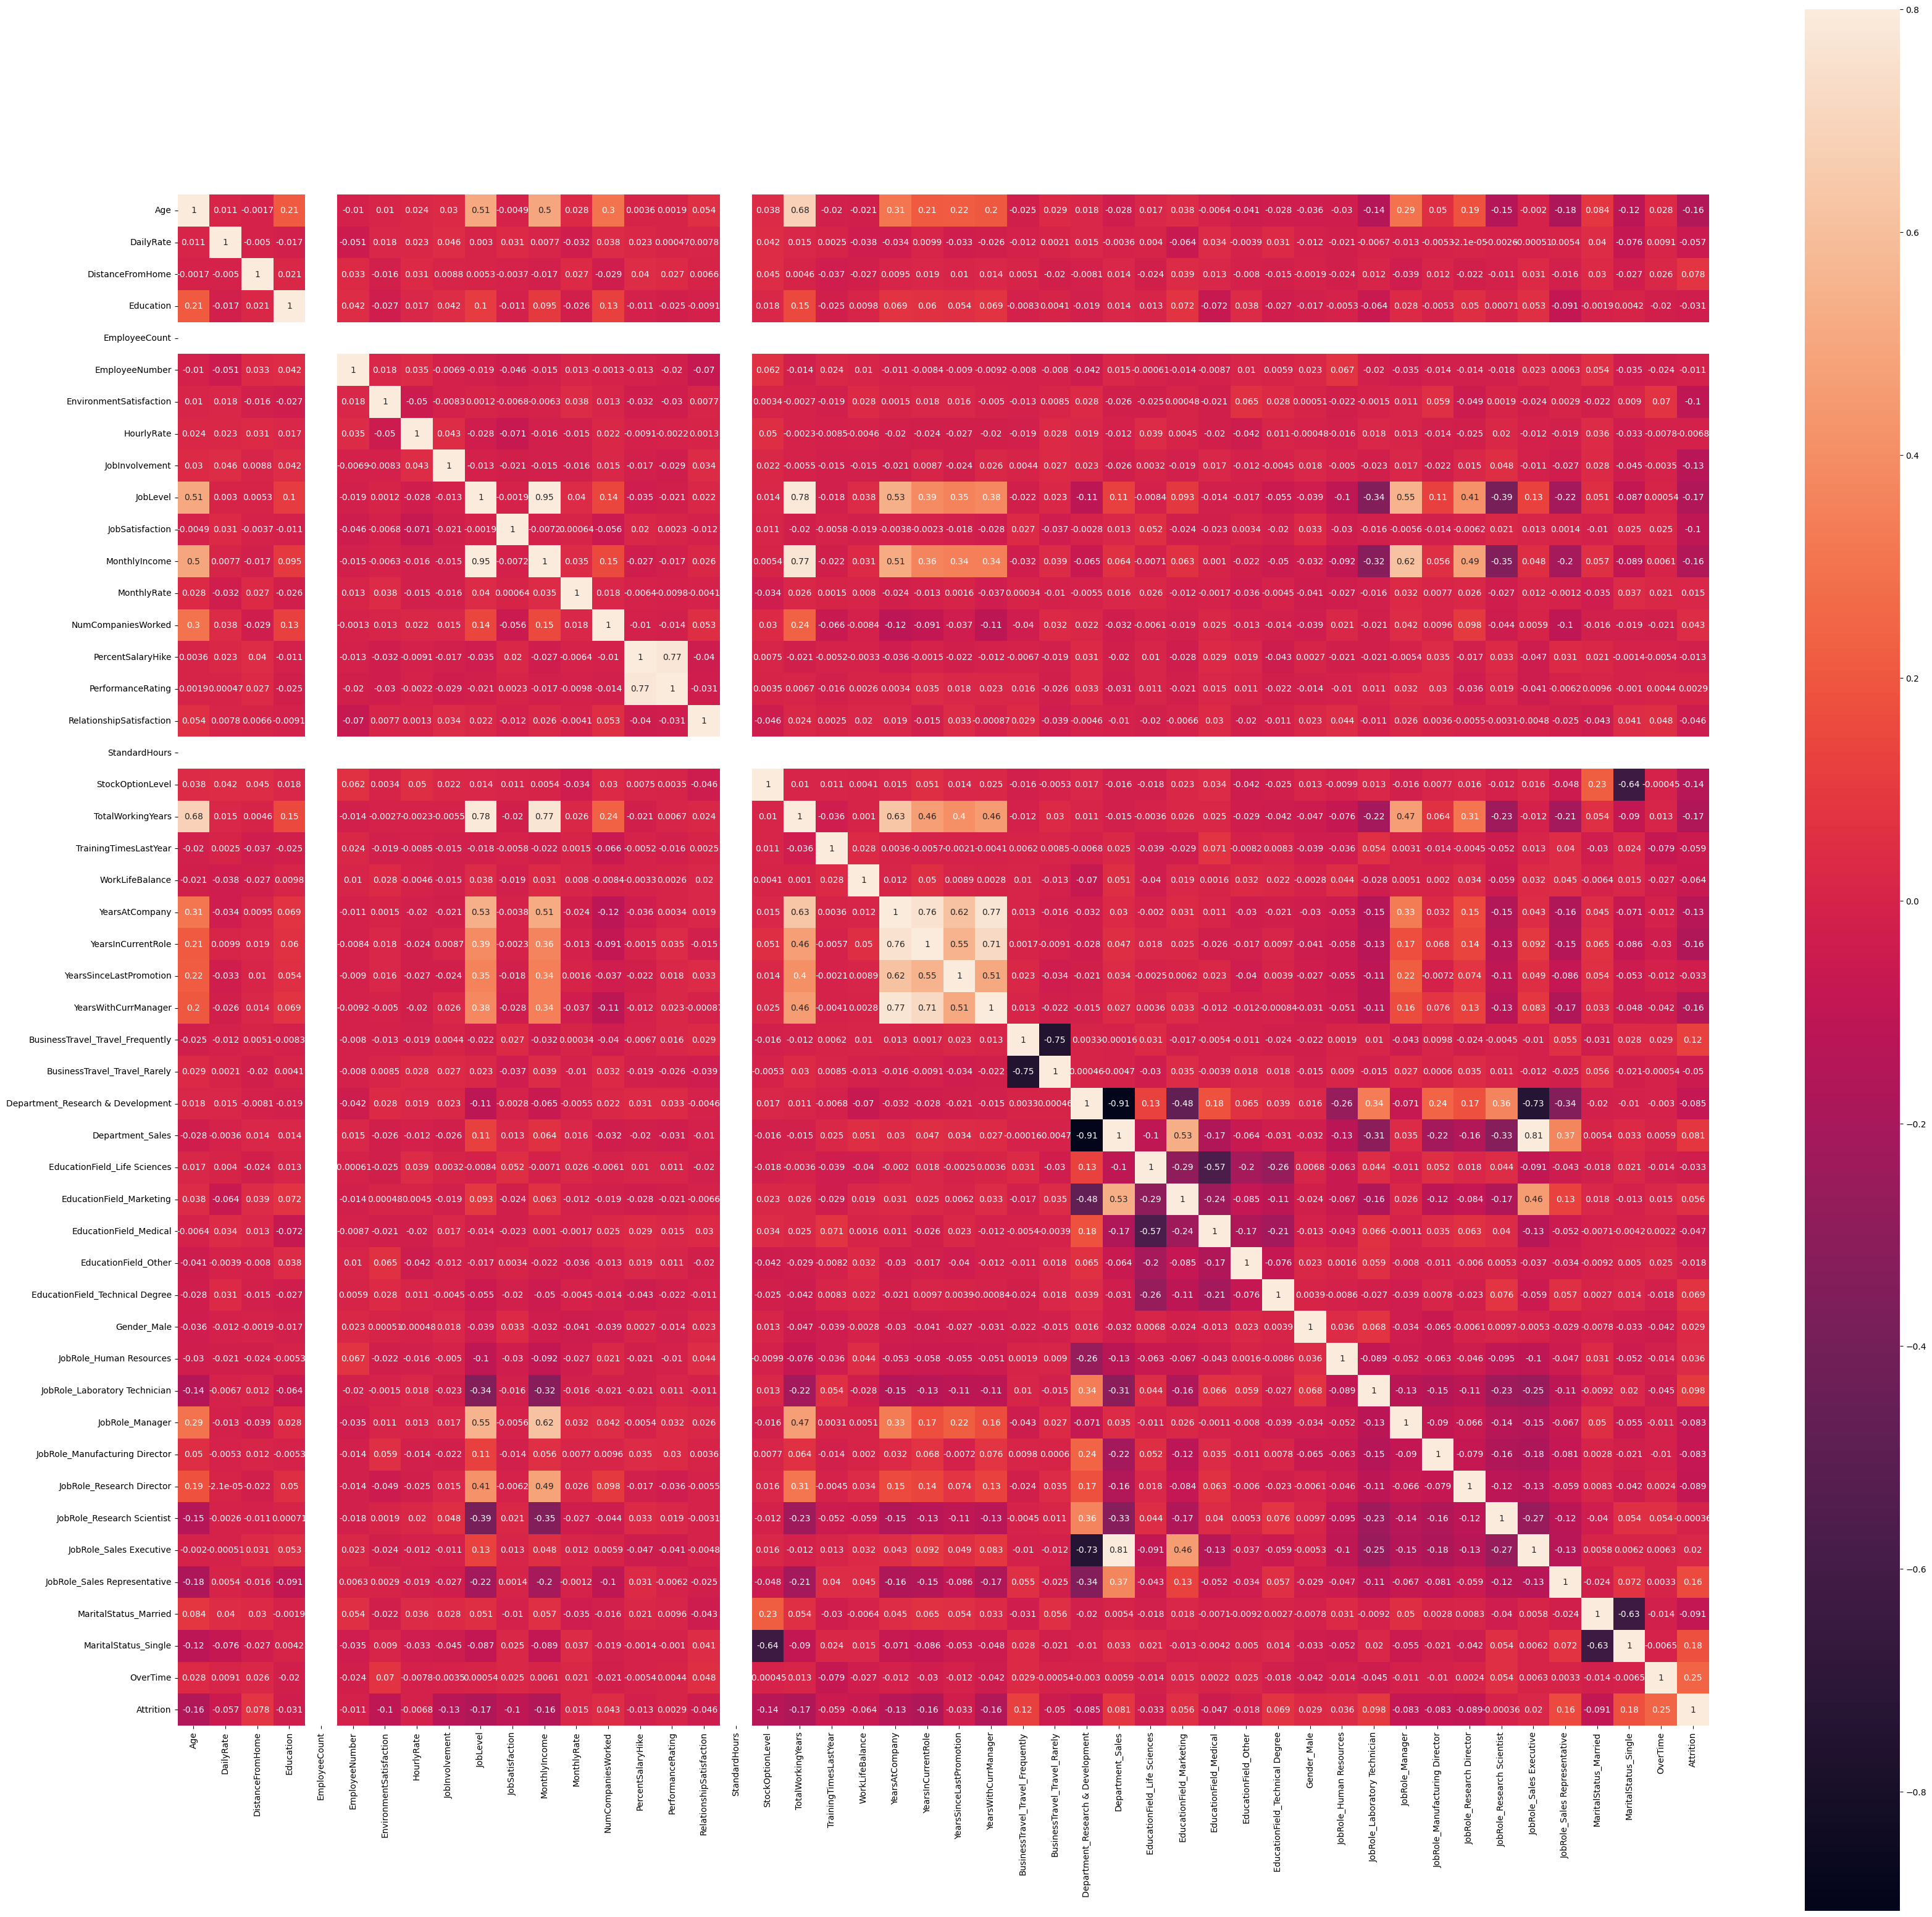

In [13]:
fig, ax = plt.subplots(figsize=(40,40))
x = data_encoded.corr()
sns.heatmap(x, vmax=.8, square=True, annot=True)
#Las mas claritas son las que tienen mas correlacion. # Cuando son binarias, las correlacciones son

# Primeras pruebas de modelos

In [14]:
X = data_encoded.drop(columns=['Attrition'])
y = data_encoded['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest

In [15]:
model = RandomForestClassifier(random_state=42,max_depth=7, max_leaf_nodes=70)
#! Revisar metricas.
# Ajustar el modelo
model.fit(X_train, y_train)
yhat = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, yhat)
probs = model.predict_proba(X_test)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, threshold = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)
print(f"\nPrecisión del modelo: {accuracy:.4f}")
print(f"\nÁrea bajo la curva ROC: {roc_auc:.4f}")
#El modelo tiene alguna capacidad de distinguir entre las clases. Cuanto más cerca de 1, mejor es el modelo.


Precisión del modelo: 0.8741

Área bajo la curva ROC: 0.7287


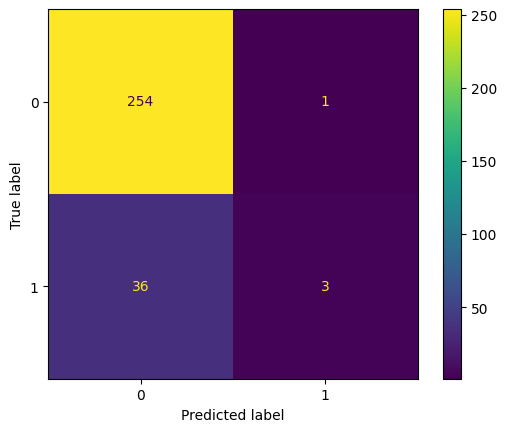

[[254   1]
 [ 36   3]]


In [16]:
cfm = confusion_matrix(y_test, yhat) # ()
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()
print(cfm) # Pinto la matriz de confusion.

In [17]:
accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

In [18]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 87.41%
Confusion Matrix:
[[254   1]
 [ 36   3]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       255
         1.0       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



In [19]:
# Crear un DataFrame con las características y sus importancias
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
})

# Ordenar las importancias en orden descendente y mostrar las 10 más importantes
top_importances = importances.sort_values('importance', ascending=False).head(11)

print(top_importances)

              feature  importance
11      MonthlyIncome    0.092594
46           OverTime    0.084373
19  TotalWorkingYears    0.052380
0                 Age    0.045911
1           DailyRate    0.041168
18   StockOptionLevel    0.039353
12        MonthlyRate    0.039143
5      EmployeeNumber    0.036893
22     YearsAtCompany    0.035671
7          HourlyRate    0.035618
9            JobLevel    0.033004


## Regresion Logistica Escalada



In [20]:
#Escalamos primero
objeto_escalador = StandardScaler() # creo el objeto escalador, escalara el dataframe
objeto_escalador.fit(X_train) # le enseñamos la estructura de columnas(33 columnas) y la media y varianza de las 33 columnasfrom sklearn.preprocessing import StandardScaler

# ======================================

objeto_escalador.transform(X_train)

# ======================================

X_train[:] = objeto_escalador.transform(X_train)
X_test[:] = objeto_escalador.transform(X_test)
# sobreescrivo los valores
# X_train = ... esto sobreescrivira el objeto X_train
# el escalador se hace fit con train y se aplica a train y test

In [21]:

clf = LogisticRegression(max_iter=1000, C=0.3) # ', class_weight='balanced'class_weight da mas peso a los 1.
clf=clf.fit(X_train, y_train)

yhat=clf.predict(X_test)
probs=clf.predict_proba(X_test)

In [22]:
    #! Hay Overfitting?
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(train_accuracy)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)

0.8937074829931972
0.891156462585034


In [23]:
# probs[:,1]>0.3
# con 0.5 es el predict normal

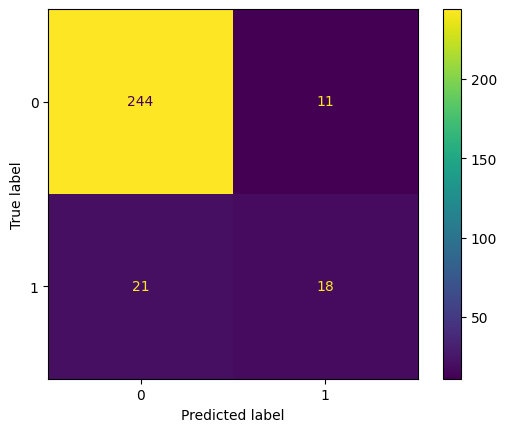

[[244  11]
 [ 21  18]]


In [24]:
cfm = confusion_matrix(y_test, yhat) # ()
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()
print(cfm) # Pinto la matriz de confusion.

In [25]:
accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 89.12%
Confusion Matrix:
[[244  11]
 [ 21  18]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       255
         1.0       0.62      0.46      0.53        39

    accuracy                           0.89       294
   macro avg       0.77      0.71      0.73       294
weighted avg       0.88      0.89      0.88       294



In [26]:
# Le doy mas peso a la muestra que tiene menos peso classweight
# Cambiando el Threshall, a partir de 0.3, etiqueta 1.
# Tener mas filas en los 1.

#! Estudiar Precision y Recall.

# 1 - Columnas, Muchas
    # Me dedicaria a Crear mas que a quitar
    # Juntar satisfaccion.
    # Probar a sumar o multiplicar.

# 2 - Hiperparametrizar. GridSearch, No poner accuracy, ponerF1 Score o Roc-AUC.

# 3 - Retocar los modelos. Comprension de las metricas para ver que preferimos fallas o acertar. con que probabilidad quiero acertar la otra metrica sera peor, porque fallaras.
    #Imagen precision de cancer.

Sin Balance
Accuracy: 88.44%
Confusion Matrix:
[[242  13]
 [ 21  18]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       255
         1.0       0.58      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.75      0.71      0.72       294
weighted avg       0.88      0.88      0.88       294

-----------------------

El modelo tiene una buena precisión general (88.43%), pero hay algunas diferencias notables entre las métricas de las clases 0 y 1.

El modelo es más preciso al predecir los casos donde los empleados no abandonan (clase 0), con una precisión y recall altos.

Sin embargo, para los casos de abandono (clase 1), aunque la precisión es más baja, el recall es aún menor, lo que indica que el modelo tiene dificultades para identificar correctamente a los empleados que abandonan la empresa.

Hay que mejorar la precisión de identificar a los empleados propensos a abandonar la empresa.

0.79587732528909


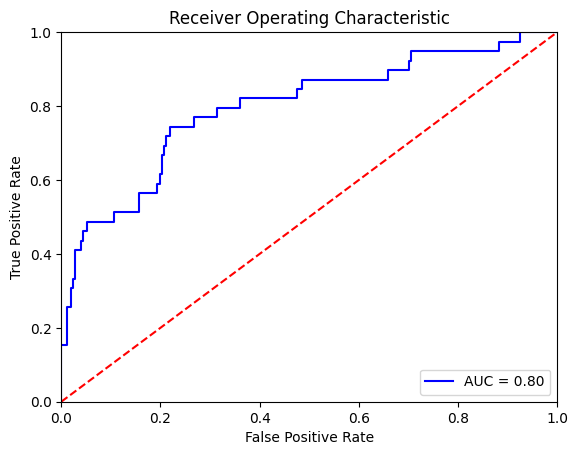

In [27]:
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# plot curve roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.8815971576707773


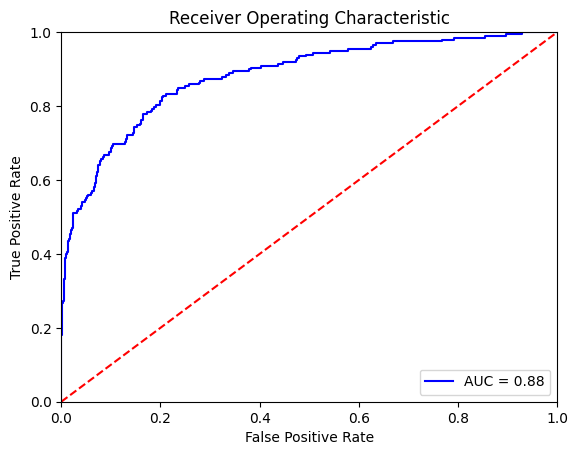

In [28]:
# devuelve la evolucion de:
# false-positive-rate de forma creciente (1-sensitivity)
# True-positive-rate de forma creciente (Sensitivity)
# threshold de forma decreciente
probs_train=clf.predict_proba(X_train) # calculamos las probabilidades (predicción)
fpr, tpr, threshold = metrics.roc_curve(y_train, probs_train[:,1]) # Hay que dar bien la Y, y las Probabilidades.
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# plot curve roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# x= fpr
# y = tpr
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XGBoost

In [29]:
import xgboost as xgb
from xgboost import XGBClassifier

xgbmodel = XGBClassifier(random_stafe=42)
# Entrenar el modelo
xgbmodel.fit(X_train, y_train)
# Realizar predicciones sobre el conjunto de prueba
yhat = xgbmodel.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:30:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "random_stafe" } are not used.

  warnings.warn(smsg, UserWarning)


In [30]:
accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 87.07%
Confusion Matrix:
[[246   9]
 [ 29  10]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93       255
         1.0       0.53      0.26      0.34        39

    accuracy                           0.87       294
   macro avg       0.71      0.61      0.64       294
weighted avg       0.85      0.87      0.85       294



## Stacking (WeightedEnsemble_L2)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

In [32]:

# Crear modelos base
base_estimators = [ ('lr', LogisticRegression(random_state=42)), ('dt', DecisionTreeClassifier(random_state=42)), ('rf', RandomForestClassifier(random_state=42)), ('gb', GradientBoostingClassifier(random_state=42)) ]

# Crear el metamodelo (modelo de segundo nivel)
meta_estimator = LogisticRegression(random_state=42)

# Crear el modelo de stacking
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_estimator, cv=5)

# Entrenar el modelo de stacking
stacking_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
yhat = stacking_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, yhat)
print(f'Precisión del modelo de stacking: {accuracy:.2f}')


Precisión del modelo de stacking: 0.90


In [33]:
accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 90.48%
Confusion Matrix:
[[252   3]
 [ 25  14]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       255
         1.0       0.82      0.36      0.50        39

    accuracy                           0.90       294
   macro avg       0.87      0.67      0.72       294
weighted avg       0.90      0.90      0.89       294



## CatBoost

In [34]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(random_state=42, verbose=0)
model.fit(X_train, y_train)
# Hacer predicciones y evaluar el modelo
yhat = model.predict(X_test)
# Calcular la precisión
accuracy = accuracy_score(y_test, yhat) * 100  # Convertir a porcentaje
print(accuracy)

87.41496598639455


In [35]:
accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 87.41%
Confusion Matrix:
[[252   3]
 [ 34   5]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       255
         1.0       0.62      0.13      0.21        39

    accuracy                           0.87       294
   macro avg       0.75      0.56      0.57       294
weighted avg       0.85      0.87      0.84       294



## AutoGluon

In [ ]:
# from autogluon.tabular import TabularPredictor

# # Define la columna objetivo
# objetivo = 'Attrition'

# # Entrenar el predictor
# predictor = TabularPredictor(label=objetivo).fit(train_data=train_data)

# # Obtener la tabla de resultados
# leaderboard = predictor.leaderboard(test_data)
# print(leaderboard)


Modelos (Sin Hiperparametrizar):

- WeightedEnsemble_L2 - RegLog - Accuracy: 90.48%[[252   3][ 25  14]]
- ___________  Regresion Logistica - Accuracy: 89.12% - [[244  11][ 21  18]]
- _______________Random Forest - Accuracy: 87.41% - [[254   1][ 36   3]]
========================================================================================
- ____________________CatBoost - Accuracy: 87.41% - [[252   3][ 34   5]]
- ____________________ XGBoost - Accuracy: 87.07% - [[246   9][ 29  10]]
